In [3]:
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-paper')
%matplotlib inline
import numpy as np

from sklearn import preprocessing
from pandas.plotting import scatter_matrix

from sklearn import preprocessing
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from pandas.plotting import scatter_matrix

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
plt.rcParams.update(plt.rcParamsDefault)

### Modifica del dataset utilizzato

In [ ]:
Cancelliamo gli attributi categorici e manteniamo solamente gli ultimi ba e pa.

In [5]:

df = pd.read_csv("ridotto.csv")
#del df['credit_default']
del df['sex']
del df['education']
del df['status']
del df['age']
del df['ps-sep']

df.head()

,limit,ba-aug,pa-sep,credit_default
0,50000,49985,2130,0
1,200000,9981,10120,0
2,30000,29280,0,0
3,140000,41717,2000,0
4,60000,48716,1788,1


In [6]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df.iloc[:,0:3].values)

/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


### Scelta dei parametri di KMeans

In [7]:
# Calcoliamo Kmeans 50 volte andando 
# ogni volta a modificare il numero di 
# cluster da usare e per ogni esecuzione
# calcoliamo anche il valore dell'SSE
Silhouette_list = list()
sse_list = list()
max_k = 50
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X)
    
    sse = kmeans.inertia_
    sse_list.append(sse)
    Silhouette = silhouette_score(X, kmeans.labels_)
    Silhouette_list.append(Silhouette)

In [8]:
diff = []
for i in range(0, len(sse_list)-1):
    tmp = sse_list[i]-sse_list[i+1]
    diff.append(tmp)

ordinata = []
for i in diff:
    ordinata.append(i)
ordinata.sort()
arr = []
for i in ordinata:
    index = diff.index(i)
    tmp = (i,index)
    arr.append(tmp)
print arr

[(0.09715502143374444, 44), (0.14227777852772405, 40), (0.17407585791779923, 45), (0.1840870929350107, 42), (0.18701219577009098, 39), (0.2017527909395369, 36), (0.21823732874070245, 46), (0.21831160475806932, 37), (0.26186624106762935, 47), (0.27482420965730014, 43), (0.28308183286610245, 30), (0.2879916875528288, 34), (0.2880287674228761, 41), (0.3472617659589847, 38), (0.3525228215441629, 33), (0.3814674404416536, 29), (0.38348788651022936, 31), (0.41115779516000295, 27), (0.4171992235883817, 35), (0.42311568481786566, 32), (0.4362905253649245, 23), (0.47156643854020963, 26), (0.4816438872058537, 25), (0.545488336618007, 24), (0.5941498333662381, 28), (0.6030421627333347, 20), (0.6929484035277014, 18), (0.7059243692824104, 21), (0.7436713056234971, 19), (0.7477171408008445, 22), (0.7769316119037164, 16), (0.8666147926082388, 15), (0.9566818533285897, 17), (1.4716703757055072, 14), (1.6007780252066581, 13), (2.0379578759143513, 12), (2.0848631102512414, 11), (2.278294754460809, 10), 

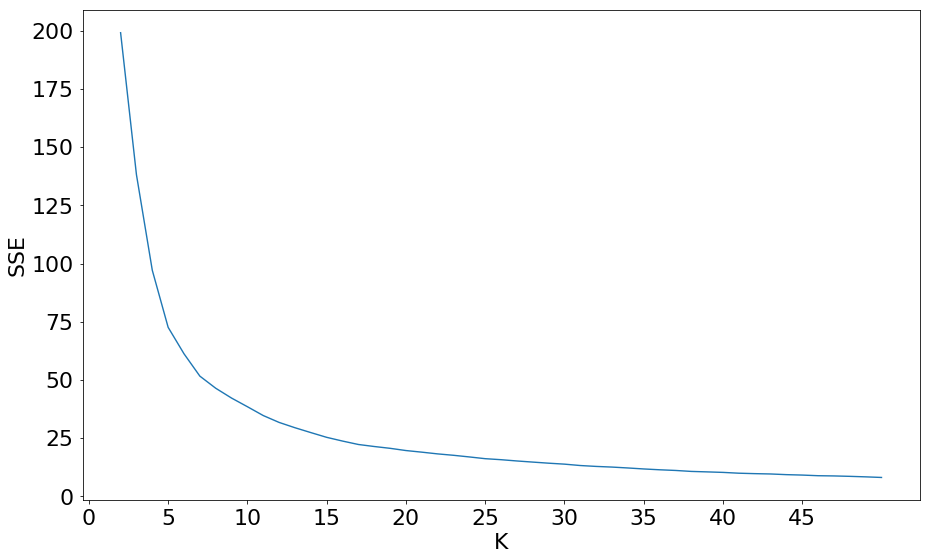

In [9]:
# Plot dell'SSE al variare di K
plt.subplots(figsize=(15, 9))
plt.plot(range(2, len(sse_list) + 2), sse_list)
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.xticks(np.arange(0, 50, 5))
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

In [10]:
ordinata = []
for i in Silhouette_list:
    ordinata.append(i)
ordinata.sort()

arr = []
for i in ordinata:
    index = Silhouette_list.index(i)
    tmp = (i,index)
    arr.append(tmp)
print arr

[(0.3936682973692564, 29), (0.39774429740483386, 26), (0.40328342799778205, 13), (0.4033873821375024, 46), (0.40353127564898456, 20), (0.4045843866999095, 47), (0.405980474049859, 41), (0.40649002478269947, 23), (0.4075226232096498, 39), (0.4076819409980069, 12), (0.4082424211948448, 34), (0.4082434482528779, 38), (0.40829028151477637, 30), (0.4106026339172877, 28), (0.4113797913033972, 31), (0.4122194635512806, 21), (0.41293400552239945, 19), (0.412947800846433, 40), (0.4130678062532388, 8), (0.4138403241822005, 22), (0.414493813418541, 48), (0.41502318249767134, 18), (0.4150324888543446, 24), (0.4153800314204702, 43), (0.4168443471185477, 25), (0.4170320819713509, 32), (0.4174496340938309, 27), (0.4175753814937648, 11), (0.4183562052235641, 45), (0.4187433756705126, 44), (0.4195405316613218, 33), (0.4211024849128, 36), (0.4211246993604157, 15), (0.4214036833374491, 16), (0.4224134587935153, 37), (0.4224454290713093, 17), (0.42377226123362016, 35), (0.4248621946593501, 14), (0.4264991

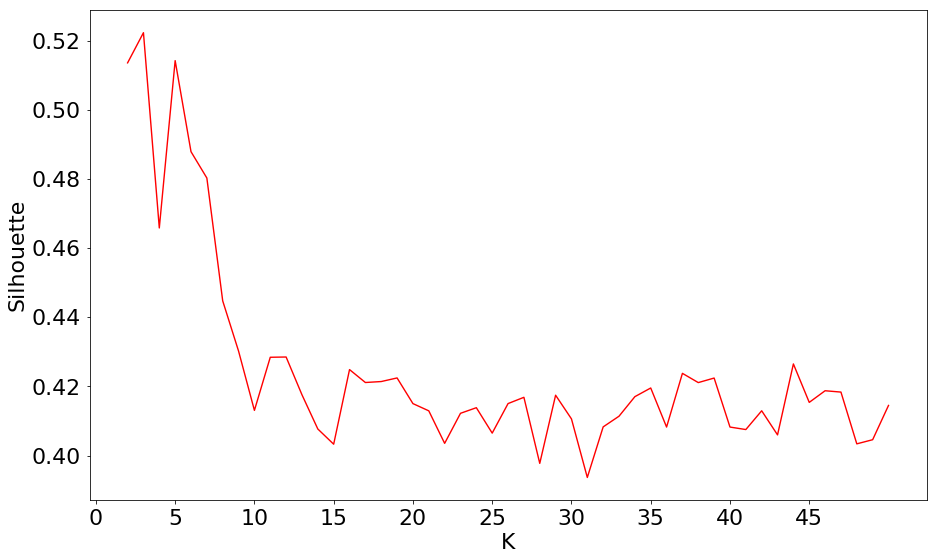

In [11]:
# Plot dell'Silhouette al variare di K
plt.subplots(figsize=(15, 9))
plt.plot(range(2, len(Silhouette_list) + 2), Silhouette_list, color='red')
plt.ylabel('Silhouette', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.xticks(np.arange(0, 50, 5))
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

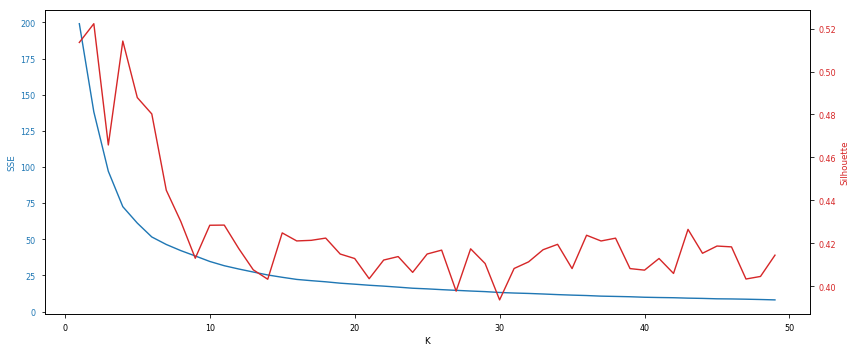

In [12]:
fig, ax1 = plt.subplots(figsize=(12, 5))
t = np.arange(1, 50, 1)
color = 'tab:blue'
ax1.set_xlabel('K')
ax1.set_ylabel('SSE', color=color)
ax1.plot(t, sse_list, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Silhouette', color=color)  # we already handled the x-label with ax1
ax2.plot(t, Silhouette_list, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

### Clustering usando l'algoritmo K-Means

In [13]:
kmeans = KMeans(n_clusters=11, n_init=11, max_iter=100)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=11, n_init=11, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [14]:
hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
sizes = dict(zip(bins, hist))

# Dimensione dei vari cluster

for id_cluster, size in sizes.items():
    print('Cluster %d: %d (%.2f)' % (id_cluster, size, size/len(X)))



Cluster 0: 1074 (0.00)
Cluster 1: 2636 (0.00)
Cluster 2: 171 (0.00)
Cluster 3: 352 (0.00)
Cluster 4: 540 (0.00)
Cluster 5: 746 (0.00)
Cluster 6: 901 (0.00)
Cluster 7: 1742 (0.00)
Cluster 8: 30 (0.00)
Cluster 9: 143 (0.00)
Cluster 10: 1665 (0.00)


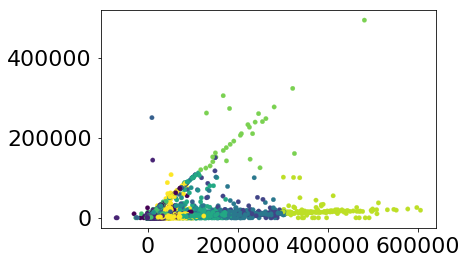

In [15]:
# Visualizzazione del cluster in due dimensioni

plt.scatter(df['ba-aug'], df['pa-sep'], c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

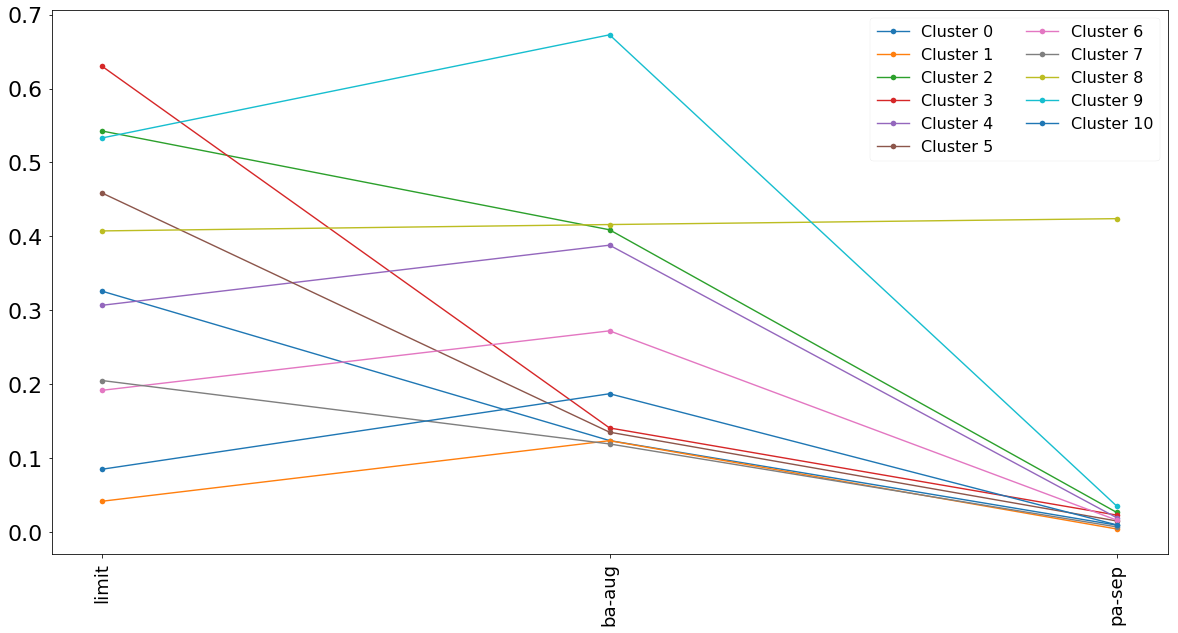

In [16]:
# Per ogni centroide visualizzo la posizione del centroide
# corrispondente

centers = kmeans.cluster_centers_

plt.figure(figsize=(20, 10))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(range(0, len(df.columns[0:3])), df.columns[0:3], fontsize=18)
plt.legend(fontsize=16, ncol=2)
plt.xticks(rotation=90)
plt.show()

In [17]:
Silhouette = silhouette_score(X, kmeans.labels_)
print Silhouette

0.4042167662276898


### Quanto i cluster sono utili per capire credit_default

In [18]:
label_encoders = dict()
column2encode = ['credit_default']

for col in column2encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
df.head()

,limit,ba-aug,pa-sep,credit_default
0,50000,49985,2130,0
1,200000,9981,10120,0
2,30000,29280,0,0
3,140000,41717,2000,0
4,60000,48716,1788,1


In [19]:
# Aggiungiamo il label che ho ottenuto con il cluster ad ogni riga
# della tabella.

df['Label'] = kmeans.labels_

for col in column2encode:
    le = label_encoders[col]
    df[col] = le.inverse_transform(df[col])

/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [20]:
hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
sizes = dict(zip(bins, hist))

# Dimensione dei vari cluster

for id_cluster, size in sizes.items():
    print('Cluster %d: %d (%.2f)' % (id_cluster, size, size/len(X)))

Cluster 0: 1074 (0.00)
Cluster 1: 2636 (0.00)
Cluster 2: 171 (0.00)
Cluster 3: 352 (0.00)
Cluster 4: 540 (0.00)
Cluster 5: 746 (0.00)
Cluster 6: 901 (0.00)
Cluster 7: 1742 (0.00)
Cluster 8: 30 (0.00)
Cluster 9: 143 (0.00)
Cluster 10: 1665 (0.00)


In [21]:
df.head()

,limit,ba-aug,pa-sep,credit_default,Label
0,50000,49985,2130,0,10
1,200000,9981,10120,0,7
2,30000,29280,0,0,1
3,140000,41717,2000,0,7
4,60000,48716,1788,1,10


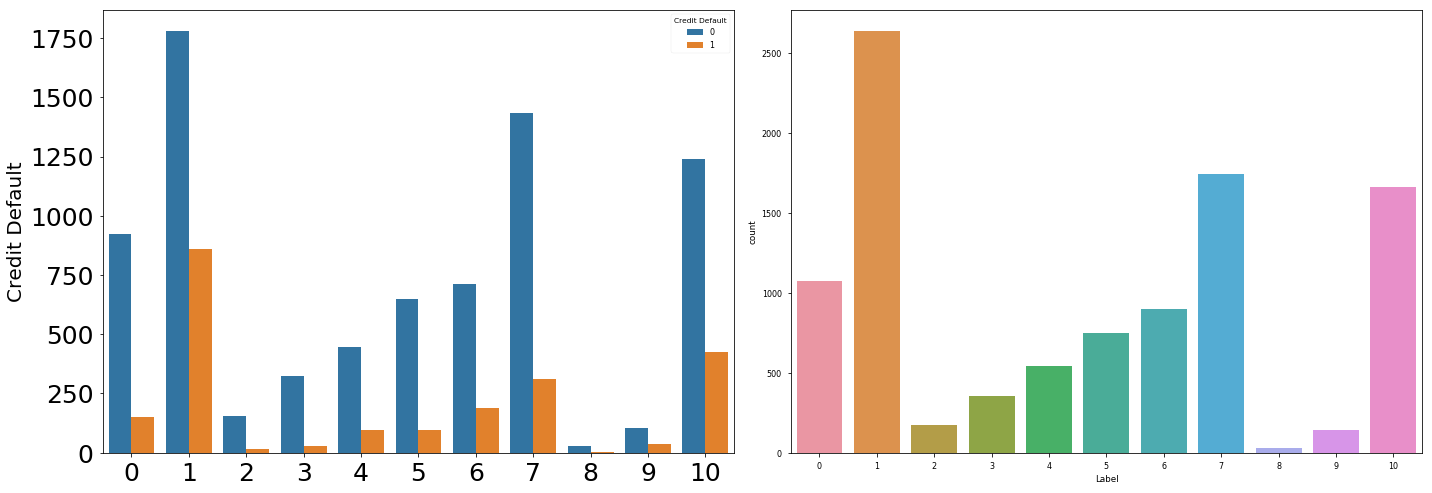

In [22]:
fig = plt.figure(figsize=(20,20))
fig_dims = (3,2)

plt.subplot2grid(fig_dims, (0, 0))
b = sns.countplot(df['Label'], hue=df['credit_default'])
plt.xticks(rotation=0)
b.set_xlabel("",fontsize=20)
b.set_ylabel("Credit Default",fontsize=20)
b.tick_params(labelsize=25)
b.legend_.set_title('Credit Default')

tmpDF = df[['pa-sep', 'Label']]
# Plot completo con la distribuzione dei vari record all'interno dei vari cluster
plt.subplot2grid(fig_dims, (0, 1))
sns.countplot(x='Label',data=tmpDF)



plt.tight_layout()
plt.show()





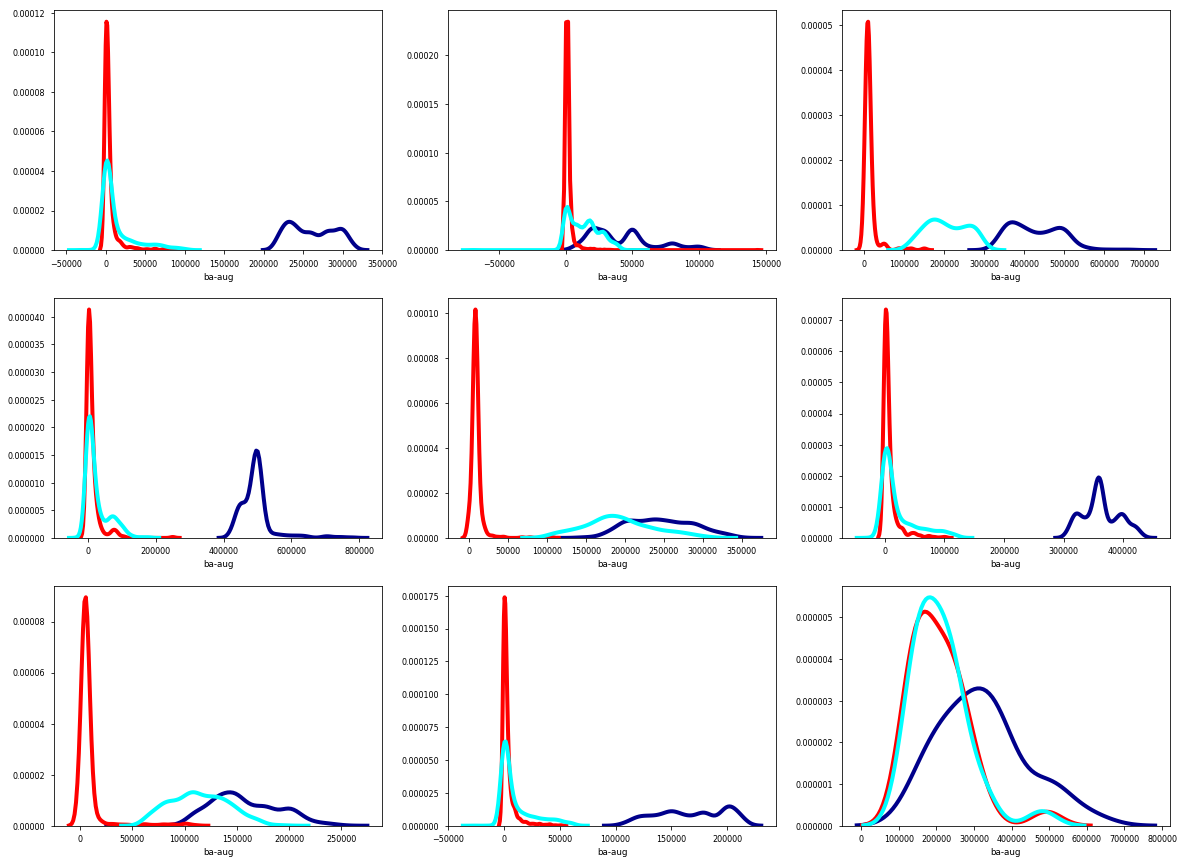

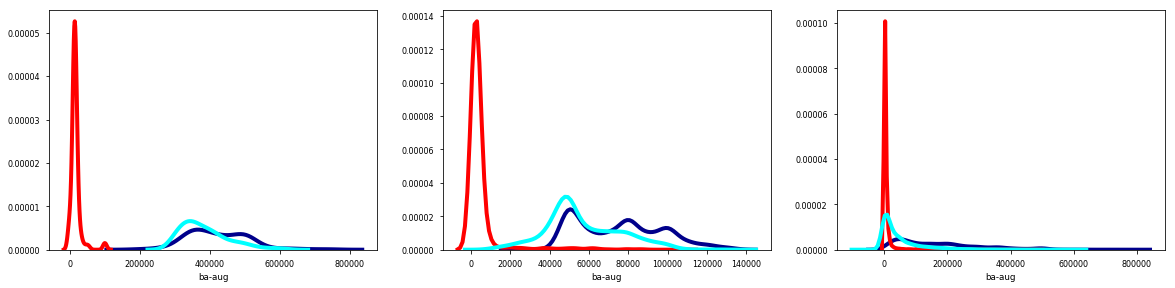

In [23]:
fig = plt.figure(figsize=(20,15))
fig_dims = (3,3)



plt.subplot2grid(fig_dims, (0, 0))
sns.distplot(df[df['Label'] == 0]['limit'], hist=False, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 0]['pa-sep'], hist=False, kde=True, 
             color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 0]['ba-aug'], hist=False, kde=True, 
             color = 'cyan', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})


plt.subplot2grid(fig_dims, (0, 1))
sns.distplot(df[df['Label'] == 1]['limit'], hist=False, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 1]['pa-sep'], hist=False, kde=True, 
             color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 1]['ba-aug'], hist=False, kde=True, 
             color = 'cyan', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.subplot2grid(fig_dims, (0, 2))
sns.distplot(df[df['Label'] == 2]['limit'], hist=False, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 2]['pa-sep'], hist=False, kde=True, 
             color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 2]['ba-aug'], hist=False, kde=True, 
             color = 'cyan', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.subplot2grid(fig_dims, (1, 0))
sns.distplot(df[df['Label'] == 3]['limit'], hist=False, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 3]['pa-sep'], hist=False, kde=True, 
             color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 3]['ba-aug'], hist=False, kde=True, 
             color = 'cyan', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.subplot2grid(fig_dims, (1, 1))
sns.distplot(df[df['Label'] == 4]['limit'], hist=False, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 4]['pa-sep'], hist=False, kde=True, 
             color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 4]['ba-aug'], hist=False, kde=True, 
             color = 'cyan', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})


plt.subplot2grid(fig_dims, (1, 2))
sns.distplot(df[df['Label'] == 5]['limit'], hist=False, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 5]['pa-sep'], hist=False, kde=True, 
             color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 5]['ba-aug'], hist=False, kde=True, 
             color = 'cyan', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})


plt.subplot2grid(fig_dims, (2, 0))
sns.distplot(df[df['Label'] == 6]['limit'], hist=False, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 6]['pa-sep'], hist=False, kde=True, 
             color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 6]['ba-aug'], hist=False, kde=True, 
             color = 'cyan', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.subplot2grid(fig_dims, (2, 1))
sns.distplot(df[df['Label'] == 7]['limit'], hist=False, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 7]['pa-sep'], hist=False, kde=True, 
             color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 7]['ba-aug'], hist=False, kde=True, 
             color = 'cyan', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.subplot2grid(fig_dims, (2, 2))
sns.distplot(df[df['Label'] == 8]['limit'], hist=False, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 8]['pa-sep'], hist=False, kde=True, 
             color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 8]['ba-aug'], hist=False, kde=True, 
             color = 'cyan', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

fig = plt.figure(figsize=(20,15))
fig_dims = (3,3)

plt.subplot2grid(fig_dims, (0,0))
sns.distplot(df[df['Label'] == 9]['limit'], hist=False, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 9]['pa-sep'], hist=False, kde=True, 
             color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 9]['ba-aug'], hist=False, kde=True, 
             color = 'cyan', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.subplot2grid(fig_dims, (0,1))
sns.distplot(df[df['Label'] == 10]['limit'], hist=False, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 10]['pa-sep'], hist=False, kde=True, 
             color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 10]['ba-aug'], hist=False, kde=True, 
             color = 'cyan', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.subplot2grid(fig_dims, (0,2))
sns.distplot(df['limit'], hist=False, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df['pa-sep'], hist=False, kde=True, 
             color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df['ba-aug'], hist=False, kde=True, 
             color = 'cyan', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.show()

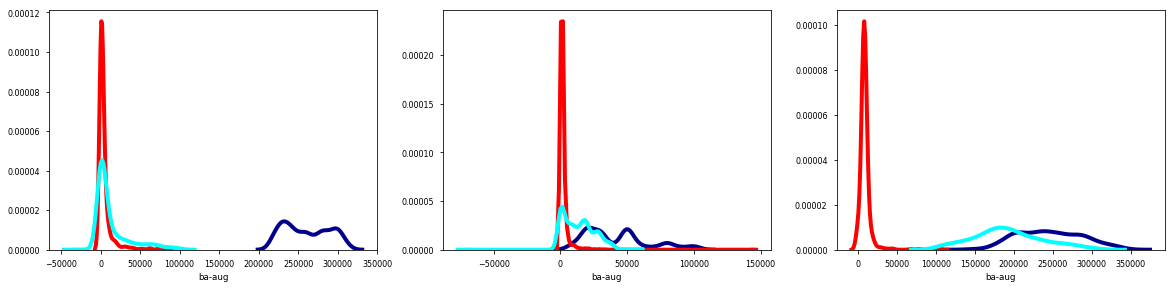

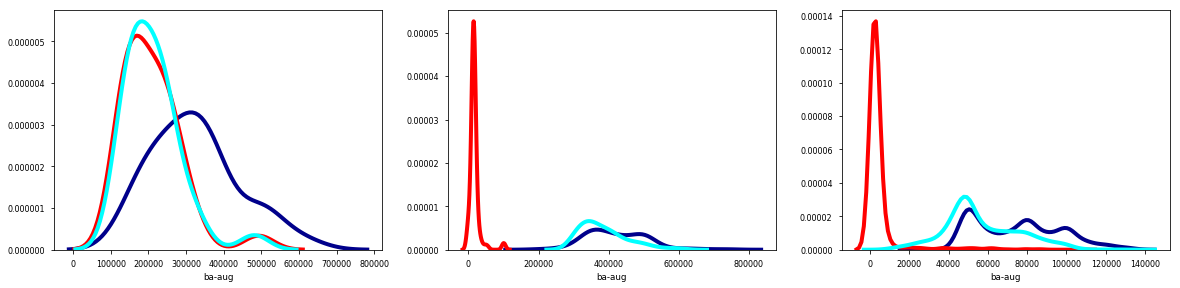

In [24]:
fig = plt.figure(figsize=(20,15))
fig_dims = (3,3)



plt.subplot2grid(fig_dims, (0, 0))
sns.distplot(df[df['Label'] == 0]['limit'], hist=False, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 0]['pa-sep'], hist=False, kde=True, 
             color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 0]['ba-aug'], hist=False, kde=True, 
             color = 'cyan', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})


plt.subplot2grid(fig_dims, (0, 1))
sns.distplot(df[df['Label'] == 1]['limit'], hist=False, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 1]['pa-sep'], hist=False, kde=True, 
             color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 1]['ba-aug'], hist=False, kde=True, 
             color = 'cyan', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})


plt.subplot2grid(fig_dims, (0, 2))
sns.distplot(df[df['Label'] == 4]['limit'], hist=False, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 4]['pa-sep'], hist=False, kde=True, 
             color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 4]['ba-aug'], hist=False, kde=True, 
             color = 'cyan', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})



fig = plt.figure(figsize=(20,15))
fig_dims = (3,3)


plt.subplot2grid(fig_dims, (0, 0))
sns.distplot(df[df['Label'] == 8]['limit'], hist=False, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 8]['pa-sep'], hist=False, kde=True, 
             color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 8]['ba-aug'], hist=False, kde=True, 
             color = 'cyan', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})



plt.subplot2grid(fig_dims, (0,1))
sns.distplot(df[df['Label'] == 9]['limit'], hist=False, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 9]['pa-sep'], hist=False, kde=True, 
             color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 9]['ba-aug'], hist=False, kde=True, 
             color = 'cyan', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.subplot2grid(fig_dims, (0,2))
sns.distplot(df[df['Label'] == 10]['limit'], hist=False, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 10]['pa-sep'], hist=False, kde=True, 
             color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 10]['ba-aug'], hist=False, kde=True, 
             color = 'cyan', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})


plt.show()

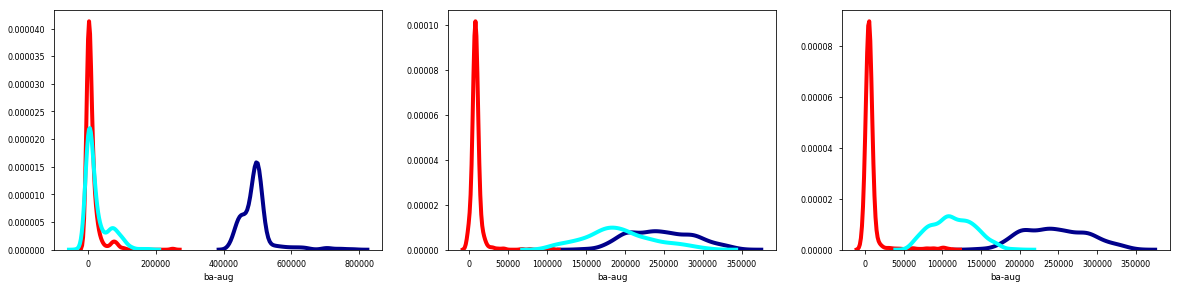

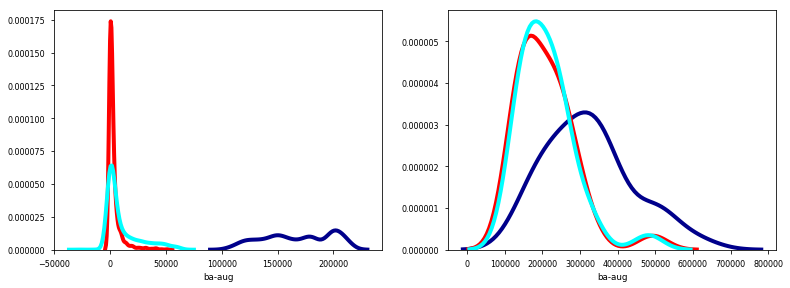

In [25]:
fig = plt.figure(figsize=(20,15))
fig_dims = (3,3)



plt.subplot2grid(fig_dims, (0, 0))
sns.distplot(df[df['Label'] == 3]['limit'], hist=False, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 3]['pa-sep'], hist=False, kde=True, 
             color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 3]['ba-aug'], hist=False, kde=True, 
             color = 'cyan', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})


plt.subplot2grid(fig_dims, (0, 1))
sns.distplot(df[df['Label'] == 4]['limit'], hist=False, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 4]['pa-sep'], hist=False, kde=True, 
             color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 4]['ba-aug'], hist=False, kde=True, 
             color = 'cyan', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})


plt.subplot2grid(fig_dims, (0, 2))
sns.distplot(df[df['Label'] == 4]['limit'], hist=False, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 6]['pa-sep'], hist=False, kde=True, 
             color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 6]['ba-aug'], hist=False, kde=True, 
             color = 'cyan', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})



fig = plt.figure(figsize=(20,15))
fig_dims = (3,3)


plt.subplot2grid(fig_dims, (0, 0))
sns.distplot(df[df['Label'] == 7]['limit'], hist=False, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 7]['pa-sep'], hist=False, kde=True, 
             color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 7]['ba-aug'], hist=False, kde=True, 
             color = 'cyan', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})



plt.subplot2grid(fig_dims, (0,1))
sns.distplot(df[df['Label'] == 8]['limit'], hist=False, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 8]['pa-sep'], hist=False, kde=True, 
             color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 8]['ba-aug'], hist=False, kde=True, 
             color = 'cyan', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})



plt.show()